<a href="https://colab.research.google.com/github/ParitoshP702/BO_vs_RL_Pricing/blob/main/BayesianOptimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math
import random

In [ ]:
import scipy
from scipy.stats import norm

In [ ]:
# true_coeff = np.array([-150,480,-165,22,-1])

In [ ]:
import torch

In [ ]:
!pip install gpytorch
import gpytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.1/266.1 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.0/173.0 kB 19.7 MB/s eta 0:00:00


In [ ]:
def func_revenue(price):

    return 100*np.exp(-((price-5)**2)/20)

In [ ]:
import gpytorch

In [ ]:
# train_x = torch.rand(2)

In [ ]:
# train_x

In [ ]:
# train_y = []
# for price in train_x.numpy():
#   train_y.append(func_revenue(price))
# train_y = np.array(train_y)
# train_y = torch.tensor(train_y)

In [ ]:
# train_y

In [ ]:
# class ExactGPModel(gpytorch.models.ExactGP):
#     def __init__(self, train_x, train_y, likelihood):
#         super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
#         self.mean_module = gpytorch.means.ConstantMean()
#         self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

#     def forward(self, x):
#         mean_x = self.mean_module(x)
#         covar_x = self.covar_module(x)
#         return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

# # initialize likelihood and model
# likelihood = gpytorch.likelihoods.GaussianLikelihood()
# model = ExactGPModel(train_x, train_y, likelihood)

In [ ]:
# likelihood = gpytorch.likelihoods.GaussianLikelihood()
# model = ExactGPModel(train_x,train_y,likelihood)


In [ ]:
# print(model)

In [ ]:
# def tune_hyperparameter(train_x,train_y):
#       # print(train_x)
#       # print(train_y)
#       likelihood = gpytorch.likelihoods.GaussianLikelihood()
#       model = ExactGPModel(train_x, train_y, likelihood)
#       model.train()
#       likelihood.train()

#       optimizer = torch.optim.Adam(model.parameters(),lr = 0.1)

#       mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood,model)

#       training_iter = 100

#       for i in range(training_iter):
#         ##zero greadients from previous iterations

#         optimizer.zero_grad()
#         ##output from model

#         output = model(train_x)

#         ##calculate loss and backprop gradients

#         loss = -mll(output,train_y)
#         # print(loss)

#         loss.backward()

#         optimizer.step()


In [ ]:
# tune_hyperparameter(train_x,train_y)

In [ ]:
# likelihood


In [ ]:
# print(model)

In [ ]:
# def acquisition(model,train_x,Xsamples):
#   train_x = torch.tensor(train_x)
#   Xsamples = torch.tensor(Xsamples)
#   # print(Xsamples)
#   model.double()
#   yhat = model(train_x).mean.detach().numpy()
#   # print(yhat)
#   best = max(yhat)
#   model.eval();
#   likelihood.eval();
#   with torch.no_grad():
#     f_preds = model(Xsamples)
#   mu = (f_preds.mean).detach().numpy()
#   std = ((f_preds.variance).detach().numpy()) ** 0.5
#   # print(mu)
#   # print(std)
#   probs = (mu-best)*norm.cdf((mu-best)/(std+1e-9)) + std*norm.pdf((mu-best)/(std+1e-9))
#   return probs


In [ ]:
# def opt_acquisition(model,train_x):
#   Xsamples = np.random.uniform(low = 0.3,high = 10,size = 10)
#   scores = acquisition(model,train_x,Xsamples)
#   ix = np.argmax(scores)
#   # print(ix)
#   return Xsamples[ix]

In [ ]:
# train_x = torch.rand(2)
# train_y = []
# for price in train_x.numpy():
#   train_y.append(func_revenue(price))
# train_y = np.array(train_y)
# train_y = torch.tensor(train_y)

In [ ]:
# train_x,train_y

In [ ]:
 def BayesOpt():
    epsilon_array = []
    train_x = torch.rand(2)
    train_y = []
    for price in train_x.numpy():
      train_y.append(func_revenue(price))
    train_y = np.array(train_y)
    train_y = torch.tensor(train_y)
    class ExactGPModel(gpytorch.models.ExactGP):
          def __init__(self, train_x, train_y, likelihood):
              super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
              self.mean_module = gpytorch.means.ConstantMean()
              self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

          def forward(self, x):
              mean_x = self.mean_module(x)
              covar_x = self.covar_module(x)
              return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)
    # initialize likelihood and model
    likelihood = gpytorch.likelihoods.GaussianLikelihood()
    model = ExactGPModel(train_x, train_y, likelihood)

    def tune_hyperparameter(train_x,train_y):
          # print(train_x)
          # print(train_y)
          likelihood = gpytorch.likelihoods.GaussianLikelihood()
          model = ExactGPModel(train_x, train_y, likelihood)
          model.train()
          likelihood.train()

          optimizer = torch.optim.Adam(model.parameters(),lr = 0.1)

          mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood,model)

          training_iter = 100

          for i in range(training_iter):
                ##zero greadients from previous iterations

                optimizer.zero_grad()
                ##output from model

                output = model(train_x)

                ##calculate loss and backprop gradients

                loss = -mll(output,train_y)
                # print(loss)

                loss.backward()

                optimizer.step()

    tune_hyperparameter(train_x,train_y)

    def acquisition(model,train_x,Xsamples):
          train_x = torch.tensor(train_x)
          Xsamples = torch.tensor(Xsamples)
          # print(Xsamples)
          model.double()
          yhat = model(train_x).mean.detach().numpy()
          # print(yhat)
          best = max(yhat)
          model.eval();
          likelihood.eval();
          with torch.no_grad():
            f_preds = model(Xsamples)
          mu = (f_preds.mean).detach().numpy()
          std = ((f_preds.variance).detach().numpy()) ** 0.5
          # print(mu)
          # print(std)
          probs = (mu-best)*norm.cdf((mu-best)/(std+1e-9)) + std*norm.pdf((mu-best)/(std+1e-9))
          return probs
    def opt_acquisition(model,train_x):
          Xsamples = np.random.uniform(low = 0,high = 100,size = 10)
          scores = acquisition(model,train_x,Xsamples)
          ix = np.argmax(scores)
          # print(ix)
          return Xsamples[ix]



    train_x = train_x.numpy()
    train_y = train_y.numpy()
    reven_array = []
    for i in range(100):

      point = opt_acquisition(model,train_x)
      true_val = func_revenue(point) + np.random.normal(0,3)
      # print(true_val)
      # print(point)
      # train_x = train_x.numpy()
      # train_y = train_y.numpy()
      train_x = np.hstack((train_x,[point]))
      train_y = np.hstack((train_y,[true_val]))
      reven_array = train_y[2:]
      epsilon =np.max([0,np.min(100 - np.array(reven_array))])
      epsilon_array.append(epsilon)
      # print(train_x)
      # print(train_y)
      tune_hyperparameter(torch.tensor(train_x),torch.tensor(train_y))

    return np.array(epsilon_array),reven_array

In [ ]:
from tqdm import tqdm

In [ ]:
# best_till_now

In [ ]:
best_till_now = []
reven_array_list = []
for i in tqdm(range(10)):
  a,b = BayesOpt()
  best_till_now.append(a)
  reven_array_list.append(b)
# np.mean(best_till_now)

100%|██████████| 10/10 [04:03<00:00, 24.30s/it]


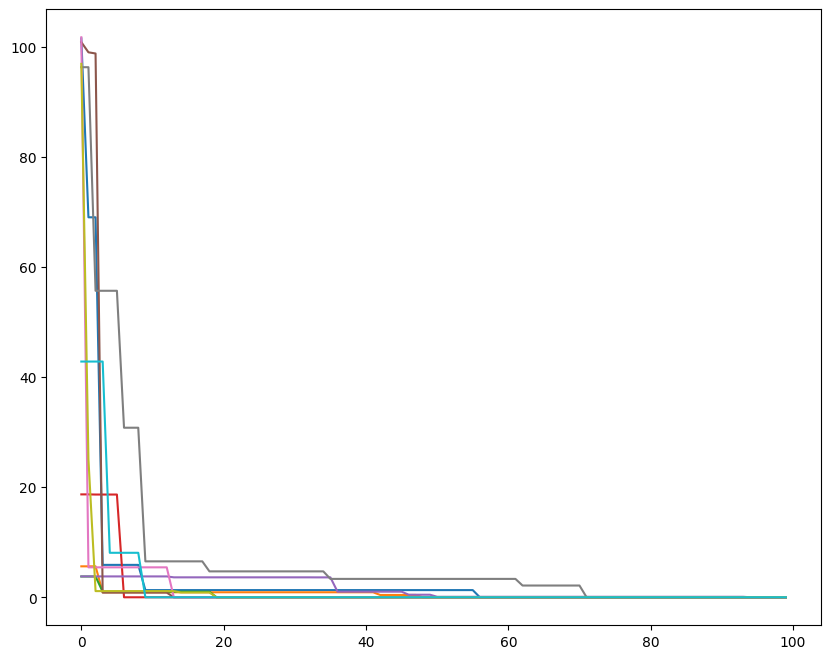

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
for i in range(10):
  plt.plot(best_till_now[i])

In [ ]:
best_till_now_averaged = np.mean(best_till_now,axis = 0)

In [ ]:
best_till_now_averaged

array([5.71812647e+01, 3.69421216e+01, 3.04625299e+01, 1.36126836e+01,
       1.01395866e+01, 1.01395866e+01, 5.78692760e+00, 5.78692760e+00,
       5.78692760e+00, 2.09437559e+00, 2.09437559e+00, 2.09437559e+00,
       2.09437559e+00, 1.44886083e+00, 1.42388643e+00, 1.42388643e+00,
       1.42388643e+00, 1.42388643e+00, 1.24204690e+00, 1.05415957e+00,
       1.05415957e+00, 1.05415957e+00, 1.05415957e+00, 1.05415957e+00,
       1.05415957e+00, 1.05415957e+00, 1.05415957e+00, 1.05415957e+00,
       1.05415957e+00, 1.05415957e+00, 1.05415957e+00, 1.05415957e+00,
       1.05415957e+00, 1.05343227e+00, 1.05343227e+00, 9.16597672e-01,
       6.56866840e-01, 6.56866840e-01, 6.56866840e-01, 6.56866840e-01,
       6.56866840e-01, 6.56866840e-01, 6.07691889e-01, 6.07691889e-01,
       6.07691889e-01, 6.07691889e-01, 5.52451622e-01, 5.52451622e-01,
       5.10556901e-01, 5.10556901e-01, 4.73091384e-01, 4.73091384e-01,
       4.73091384e-01, 4.73091384e-01, 4.73091384e-01, 4.73091384e-01,
      

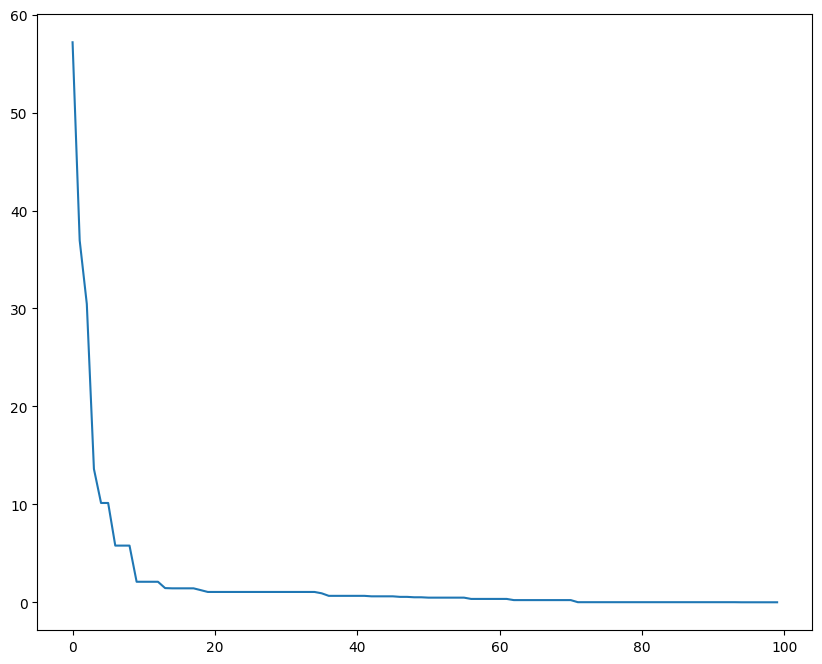

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(best_till_now_averaged)

In [ ]:
import pickle

In [ ]:
file_path = open("BO_exp_reven.txt","wb")
pickle.dump(best_till_now_averaged,file_path)

In [ ]:
def update_mean(rev,p_ar):
    sum = 0
    for i in range(len(rev)):
        price = p_ar[i]
        p = p_vector(price)
        sum += rev[i]*p/100
    return sum


In [ ]:
def update_mat(p_ar):
    sum = 0
    for i in range(len(p_ar)):
        price = p_ar[i]
        p = p_vector(price)
        sum += (p@np.transpose(p))/100
    return sum

In [ ]:
b1 = 0
b2 = 0.5-(3/28)**0.5
b3 = 0.5
b4 = 0.5+(3/28)**0.5
b5 = 1
barycentric_spanner = [b1,b2,b3,b4,b5]

In [ ]:
import scipy
from scipy.optimize import minimize

In [ ]:
def Thompson():
    epsilon_array = []
    def p_vector(p):
        p_vec = np.array([1,p,p**2,p**3,p**4])
        return p_vec.reshape(len(p_vec),1)

    def g_fun(p,*args):
          p_vec = np.array([1,p,p**2,p**3,p**4])
          coeff_array = args
          return -np.sum(coeff_array*p_vec)
    var_cov_inv = np.zeros((5,5))
    for b in barycentric_spanner:
        b_vec = p_vector(b)
        var_cov_inv += b_vec@np.transpose(b_vec)

    var_cov = np.linalg.inv(var_cov_inv)
    mu_ = np.array([0,0,0,0,0])
    pl = 0.3
    ph = 10
    w = np.random.multivariate_normal(np.array([0,0,0,0,0]),var_cov)
    price_estimate = minimize(g_fun,x0 = np.array([random.random()]),args = (w),bounds = [(pl,ph)])["x"][0]
    p_array = []
    p_curr = p_vector(price_estimate)
    p_array.append(price_estimate)
    reven_array = []
    def update_mat(p_ar):
        sum = 0
        for i in range(len(p_ar)):
            price = p_ar[i]
            p = p_vector(price)
            sum += (p@np.transpose(p))/100
        return sum

    for i in tqdm(range(100)):
        rev_curr = (true_coeff.reshape(1,5)@p_curr)[0][0]+np.random.normal(0,10)
        reven_array.append(rev_curr)
        var_copy = var_cov
        mu_copy = mu_
        var_cov = np.linalg.inv(np.linalg.inv(var_copy) + update_mat(p_array))
        # np.linalg.eig(var_cov)
        min_ev = np.min(np.linalg.eig(var_cov)[0])
        if min_ev <= 0:
            var_cov += np.diag(np.array([1e-5,1e-5,1e-5,1e-5,1e-5]))
        mu_ = var_cov@(np.linalg.inv(var_copy)@mu_copy.reshape(5,1) + update_mean(reven_array,p_array))
    #     mu_ = var_cov@( rev_curr*p_curr/100)
        mu_ = mu_.reshape(5,)
        w_sample = np.random.multivariate_normal(mu_,var_cov)
        price_estimate = minimize(g_fun,x0 = np.array([random.random()]),args = (w_sample),bounds = [(pl,ph)])["x"][0]
        p_curr = p_vector(price_estimate)
        p_array.append(price_estimate)
        epsilon =np.max([0,np.min(323.60 - np.array(reven_array))])
        epsilon_array.append(epsilon)
    return np.array(epsilon_array)


In [ ]:
best_till_now_thmp = []
for i in range(10):
  best_till_now_thmp.append(Thompson())

<ipython-input-103-97ec27d92017>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  p_vec = np.array([1,p,p**2,p**3,p**4])
  0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-103-97ec27d92017>:47: RuntimeWarning: covariance is not positive-semidefinite.
  w_sample = np.random.multivariate_normal(mu_,var_cov)
100%|██████████| 100/100 [00:00<00:00, 378.29it/s]


In [ ]:
best_till_thmp_averaged = np.mean(best_till_now_thmp,axis = 0)


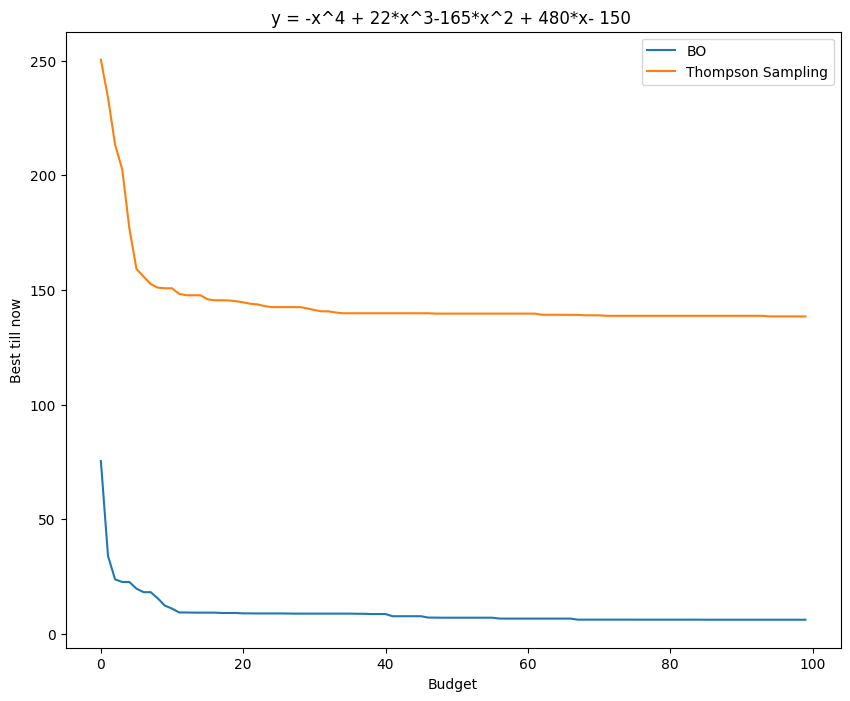

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(best_till_now_averaged,label = "BO")
plt.plot(best_till_thmp_averaged,label = "Thompson Sampling")
plt.title("y = -x^4 + 22*x^3-165*x^2 + 480*x- 150 ")
plt.ylabel("Best till now")
plt.xlabel("Budget")
plt.legend()
plt.sav